In [1]:
## Importing Libraries
import pandas as pd
import numpy as np
import glob
import os
import re
import math
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import container
import scipy as sp
from scipy.optimize import curve_fit
%matplotlib widget

In [2]:
plt.rcParams.update({'font.size': 12})
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3

# Set major tick parameters for all plots
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

## Importing all the Raman pressure files

In [3]:
pathL = '../data/raw/Loading/Raman/'
pathUL = '../data/raw/Unloading/Raman/'

In [4]:
#FIles for 20X magnification Raman spectroscopy
file_20X_L = ['39_Re0p10Mo0p90B2_OmniDAC_Run1_65p0bar_89p0GPa_loading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_20x_900x1_1', 
            '49_Re0p10Mo0p90B2_OmniDAC_Run1_71p0bar_130p0GPa_loading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_20x_900x1_4',
            '50_Re0p10Mo0p90B2_OmniDAC_Run1_74p0bar_140p0GPa_loading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_20x_900x1_5',
            '51_Re0p10Mo0p90B2_OmniDAC_Run1_96p0bar_150p0GPa_loading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_20x_900x1_4'] #Files for loading pressure

file_20X_UL=['101_Re0p10Mo0p90B2_OmniDAC_Run1_33p0bar_129p0GPa_unloading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_20x_900x1_1',
             '105_Re0p10Mo0p90B2_OmniDAC_Run1_17p0bar_100p0GPa_unloading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_20x_900x1_2',
            '106_Re0p10Mo0p90B2_OmniDAC_Run1_8p0bar_50p0GPa_unloading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_20x_900x1_4']#files for unloading pressure


In [5]:
#FIles for 20X magnification Raman spectroscopy
file_40X_L = ['40_Re0p10Mo0p90B2_OmniDAC_Run1_65p0bar_89p0GPa_loading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_40x_900x1_1',
             '49_Re0p10Mo0p90B2_OmniDAC_Run1_71p0bar_130p0GPa_loading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_40x_900x1_1',
              '50_Re0p10Mo0p90B2_OmniDAC_Run1_74p0bar_140p0GPa_loading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_40x_900x1_1',
              '51_Re0p10Mo0p90B2_OmniDAC_Run1_96p0bar_150p0GPa_loading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_40x_900x1_1']

file_40X_UL = ['101_Re0p10Mo0p90B2_OmniDAC_Run1_33p0bar_129p0GPa_unloading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_40x_900x1_1',
               '105_Re0p10Mo0p90B2_OmniDAC_Run1_17p0bar_100p0GPa_unloading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_40x_900x1_1',
               '106_Re0p10Mo0p90B2_OmniDAC_Run1_8p0bar_50p0GPa_unloading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_40x_900x1_1']

In [6]:
#Dictionary for 20X files
dict_20X = {}
for file in file_20X_L:
    file_num = int(re.split('_', file)[0])
    dict_20X[file_num] = pd.read_csv(pathL+file+'.csv', delimiter = '\t', names = ['RS','Intensity'], skiprows = [0])  #naming wavelength column 'RS' to avoid renaming later
for file in file_20X_UL:
    file_num = int(re.split('_', file)[0])
    dict_20X[file_num] = pd.read_csv(pathUL+file+'.csv', delimiter = '\t', names = ['RS','Intensity'], skiprows = [0])
    
#Dict for 40 X files

dict_40X = {}
for file in file_40X_L:
    file_num = int(re.split('_', file)[0])
    dict_40X[file_num] = pd.read_csv(pathL+file+'.csv', delimiter = '\t', names = ['RS','Intensity'], skiprows = [0])  #
for file in file_40X_UL:
    file_num = int(re.split('_', file)[0])
    dict_40X[file_num] = pd.read_csv(pathUL+file+'.csv', delimiter = '\t', names = ['RS','Intensity'], skiprows = [0])
        

In [7]:
#Background for 20X and 40X during loading and unloading pressure
dict_20X_bgd = {}
for file in file_20X_L:
    file_num = int(re.split('_', file)[0])
    dict_20X_bgd[file_num] = pd.read_csv(pathL+file+'_bgd'+'.csv', delimiter = '\t', names = ['RS','Intensity'], skiprows = [0])
for file in file_20X_UL:
    file_num = int(re.split('_', file)[0])
    dict_20X_bgd[file_num] = pd.read_csv(pathUL+file+'_bgd'+'.csv', delimiter = '\t', names = ['RS','Intensity'], skiprows = [0])
    
dict_40X_bgd = {}
for file in file_40X_L:
    file_num = int(re.split('_', file)[0])
    dict_40X_bgd[file_num] = pd.read_csv(pathL+file+'_bgd'+'.csv', delimiter = '\t', names = ['RS','Intensity'], skiprows = [0])
for file in file_40X_UL:
    file_num = int(re.split('_', file)[0])
    dict_40X_bgd[file_num] = pd.read_csv(pathUL+file+'_bgd'+'.csv', delimiter = '\t', names = ['RS','Intensity'], skiprows = [0])
        

##  Subtracting Background from Data

In [8]:
#Converting wavelength to raman shift using source wavelength as 637.8 nm

dict_RS_20X = {}
for f in dict_20X.keys():
    X = (10**7)*((1/637.8)-(1/dict_20X[f].RS)) #changing wavelength to raman shift
    Y= (dict_20X[f].Intensity - dict_20X_bgd[f].Intensity).rolling(5, center =True).mean()
    df= pd.DataFrame([X,Y]).T.dropna().reset_index()
    dict_RS_20X[f] = df 
    
    
dict_RS_40X = {}
for f in dict_40X.keys():
    X = (10**7)*((1/637.8)-(1/dict_40X[f].RS)) #changing wavelength to raman shift
    Y= (dict_40X[f].Intensity - dict_40X_bgd[f].Intensity).rolling(5, center =True).mean()
    df= pd.DataFrame([X,Y]).T.dropna().reset_index()
    dict_RS_40X[f] = df 
    


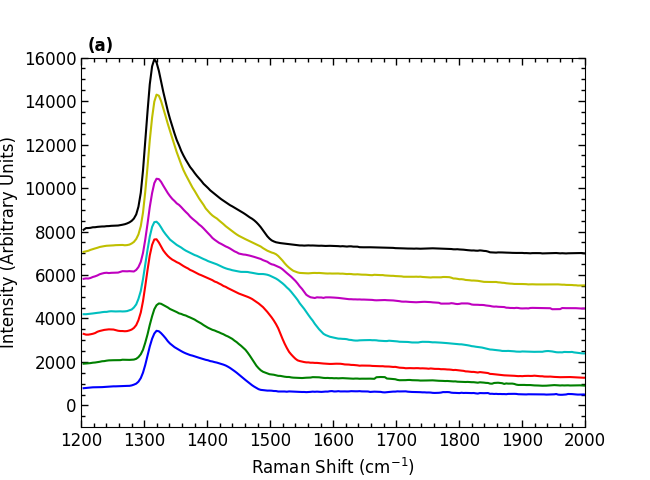

In [9]:
#Plotting 20X Ramana in graph
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
offset = [-200,-200,-1100, 100, 2700, 3900, 5500] #offsetting the Raman plots for better visualization
i=0
fig,ax = plt.subplots(figsize = (6.5,4.8))
for f in dict_RS_20X.keys():
    ax.plot(dict_RS_20X[f].RS,dict_RS_20X[f].Intensity+offset[i],color = colors[i], label = f)
    i= i+1
#ax.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax.text(1210, 16300, '(a)', weight = 'bold')
ax.set_ylim(-1000, 16000)
ax.set_xlim(1200,2000)
ax.set_ylabel("Intensity (Arbitrary Units)")
ax.set_xlabel("Raman Shift (cm$^{-1}$)");

In [10]:
dict_RS_20X.keys()

dict_keys([39, 49, 50, 51, 101, 105, 106])

In [11]:
#plt.savefig('../publication_ready/Raman_20X.pdf',bbox_inches='tight')

In [12]:
dict_RS_40X.keys()

dict_keys([40, 49, 50, 51, 101, 105, 106])

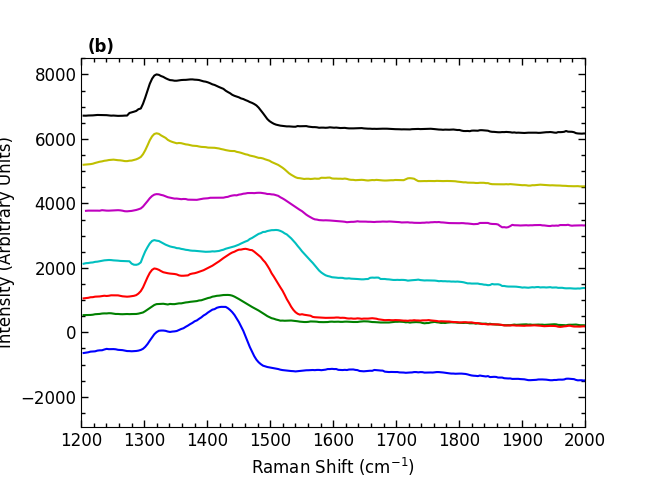

In [13]:
#Plotting 40 X Raman

offset = [-2500,-100,-900, 500, 2800, 4000, 5600]
i=0
fig,ax = plt.subplots(figsize = (6.5,4.8))
for f in dict_RS_40X.keys():
    ax.plot(dict_RS_40X[f].RS,dict_RS_40X[f].Intensity+offset[i], color= colors[i],label = f)
    i= i+1
#ax.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax.text(1210, 8700, '(b)', weight = 'bold')
ax.set_xlim(1200,2000)
ax.set_ylabel("Intensity (Arbitrary Units)")
ax.set_xlabel("Raman Shift (cm$^{-1}$)");

In [14]:
#plt.savefig('../publication_ready/Raman_40X.pdf',bbox_inches='tight')

In [15]:
import matplotlib.patches as patches

In [16]:
# AN example of Raman signal

Text(1210, 9700, '(a)')

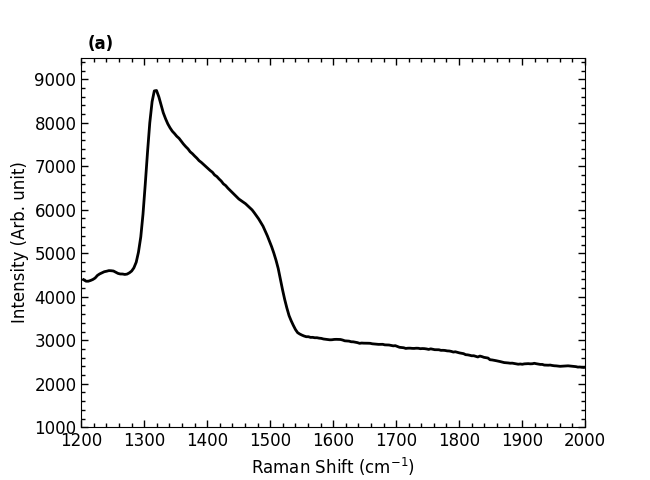

In [17]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig,ax = plt.subplots(figsize = (6.5,4.8))
# axin = inset_axes(ax, width="50%", height="50%", loc='upper right')
for f in [50]:
    ax.plot(dict_RS_20X[f].RS,(dict_RS_20X[f].Intensity),linewidth= 2, color= 'k',label = f)
    #ax.legend(loc='upper right', bbox_to_anchor=(1, 1))
    Derivative = 5*(dict_RS_20X[f].Intensity.diff()/dict_RS_20X[f].RS.diff()).rolling(5, center =True).mean()
    idx = Derivative[60:150].idxmin()
    #print(dict_RS_20X[f].RS[idx] )
    #now find the index greater than idx where y(index  +1) = or < y(index)   
    # ax.plot(dict_RS_20X[f].RS,(Derivative),color = 'red')
    # axin.plot(dict_RS_20X[f].RS, Derivative, label=f, color ='red')
#ax.legend(loc="upper right")
ax.set_xlim(1200,2000)
ax.set_ylim(1000,9500)
ax.set_ylabel("Intensity (Arb. unit)")
ax.set_xlabel("Raman Shift (cm$^{-1}$)");
ax.text(1210, 9700, '(a)', fontweight='bold')



In [18]:
plt.close('all')

In [19]:
#plt.savefig('/home/ad.ufl.edu/shubham.sinha/pdrive/ResLabs/HamlinLab/Users/Shubham_Sinha/dissertation/Raman_zoomed.pdf',bbox_inches='tight')

(-80.0, 25.0)

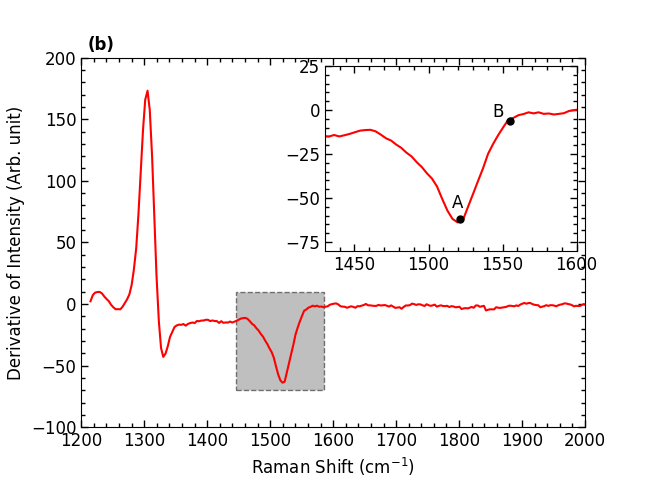

In [20]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig,ax = plt.subplots(figsize = (6.5,4.8))
axin = inset_axes(ax, width="50%", height="50%", loc='upper right')
for f in [50]:
    #ax.plot(dict_RS_20X[f].RS,(dict_RS_20X[f].Intensity-1000)/2,label = f)
    #ax.legend(loc='upper right', bbox_to_anchor=(1, 1))
    Derivative = (dict_RS_20X[f].Intensity.diff()/dict_RS_20X[f].RS.diff()).rolling(5, center =True).mean()
    idx = Derivative[60:150].idxmin()
    #print(dict_RS_20X[f].RS[idx] )
    #now find the index greater than idx where y(index  +1) = or < y(index)   
    ax.plot(dict_RS_20X[f].RS,(Derivative),color = 'red')
    axin.plot(dict_RS_20X[f].RS, Derivative, label=f, color ='red')
#ax.legend(loc="upper right")
ax.set_xlim(1200,2000)
ax.set_ylim(-100,200)
ax.set_ylabel("Derivative of Intensity (Arb. unit)")
ax.set_xlabel("Raman Shift (cm$^{-1}$)");

# Define the center of the box and the radius
x1, y1 = 1516, -30  # Coordinates of the point
d1 = 70 # Radius of the box
d2 = 40
# Calculate the lower left corner of the rectangle
lower_left_x = x1 - d1
lower_left_y = y1 - d2


ax.text(1210,206,'(b)',fontweight = 'bold')
# Create a rectangle patch
rect = patches.Rectangle((lower_left_x, lower_left_y), 2*d1, 2*d2, linewidth=1, edgecolor='black', facecolor='grey',alpha = 0.5, linestyle = 'dashed')

# Add the rectangle to the plot
ax.add_patch(rect)
# Define the coordinates for the zoomed-in area
x_zoom = [1430, 1600]
y_zoom = [-80, 25]

# Create the inset axes
axin.xaxis.set_minor_locator(AutoMinorLocator(5))
axin.yaxis.set_minor_locator(AutoMinorLocator(5))
axin.xaxis.set_major_locator(MultipleLocator(50))
# Add the text "A" and "B" at specified positions in the inset plot
axin.text(1516, -56, 'A', fontsize=12, color='black')
axin.text(1543, -4, 'B', fontsize=12, color='black')
# Draw small lines at the specified positions in the inset plot
axin.plot([1521], [-62], marker='o', markersize=5, color='black')
axin.plot([1555], [-6.2], marker='o', markersize=5, color='black')
#axin.vlines(1486,-4,20,color = 'black')
axin.set_xlim(x_zoom)
axin.set_ylim(y_zoom)

In [21]:
#plt.savefig('/home/ad.ufl.edu/shubham.sinha/pdrive/ResLabs/HamlinLab/Users/Shubham_Sinha/dissertation/Raman_derivative.pdf',bbox_inches='tight')

In [22]:
# Function that can be used to estimate pressure based on Raman shift 
def P_raman(v):
    '''
    Enter v as the Raman shift in cm-1
    '''
    K = 547
    K_der = 3.75
    v0 = 1332
    F = K*((v-v0)/v0)*(1+0.5*(K_der-1)*(v-v0)/v0)
    return F
    

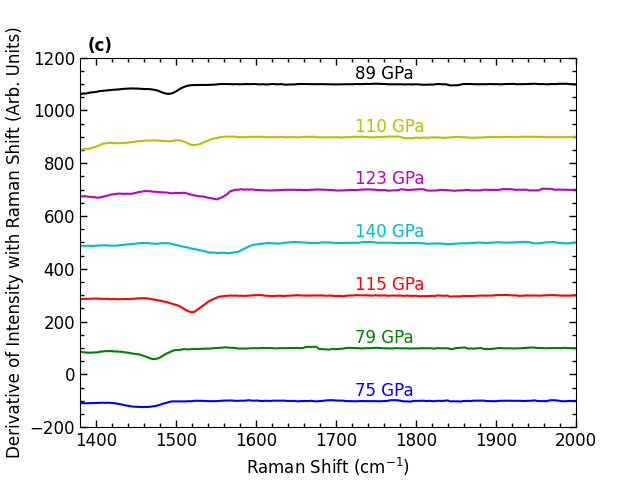

In [23]:
#Plotting derivative of 20X Raman
#Reference diamond peak  = 1310.48 cm^-1

i= 0
P= ['75 GPa', '79 GPa','115 GPa','140 GPa','123 GPa','110 GPa','89 GPa']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

offset = -200
fig,ax = plt.subplots()
for f in dict_RS_20X.keys():
    offset = offset +100
    Derivative = (dict_RS_20X[f].Intensity.diff()/dict_RS_20X[f].RS.diff()).rolling(5, center =True).mean()
    idx = Derivative[60:150].idxmin()
    #print(dict_RS_20X[f].RS[idx] )
    idx = idx+20
    #
    #now find the index greater than idx where y(index  +1) = or < y(index)
    
    while (Derivative[idx-1] > Derivative[idx]) or (Derivative[idx-2] > Derivative[idx-1]) or (Derivative[idx-3] > Derivative[idx-2]) or (Derivative[idx-4] > Derivative[idx-3]) or (abs(Derivative[idx-4] - Derivative[idx]) < 10):
        idx = idx-1
    shift = dict_RS_20X[f].RS[idx]        
    ax.plot(dict_RS_20X[f].RS,(Derivative)+offset, color = colors[i])
    offset = offset+100
    ax.text(1724,-80+200*i,P[i], color = colors[i])
    i+=1
#ax.legend(loc="upper right")
ax.text(1390, 1225, '(c)', weight = 'bold')
ax.set_xlim(1380,2000)
ax.set_ylim(-200,1200)
ax.set_ylabel("Derivative of Intensity with Raman Shift (Arb. Units)")
ax.set_xlabel("Raman Shift (cm$^{-1}$)");

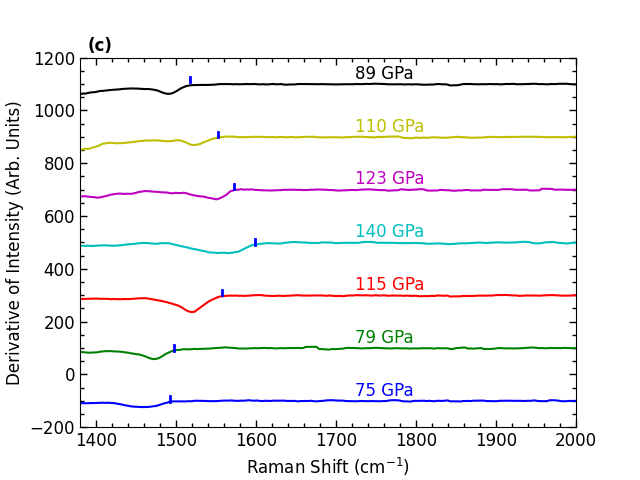

In [24]:
# Sample data points as tuples
data = [(1492, -103), (1497, 90), (1558, 300), (1599, 491), (1573, 702), (1552, 899), (1517,1107)]  # Replace this with your data points

# Extracting x and y coordinates from the tuples
x_coords = [point[0] for point in data]
y_values = [point[1] for point in data]


# Length of the vertical lines
line_length = 20

# Plotting small vertical lines at each x-coordinate
for x, y in data:
    plt.plot([x, x], [y, y + line_length], color='blue', linestyle='-', linewidth=2)

# Customizing the plot
plt.ylabel("Derivative of Intensity (Arb. Units)")
plt.xlabel("Raman Shift (cm$^{-1}$)");

# Show plot
plt.show()


In [25]:
#plt.savefig('../publication_ready/RDer_20X.pdf',bbox_inches='tight')

In [26]:
plt.close('all')

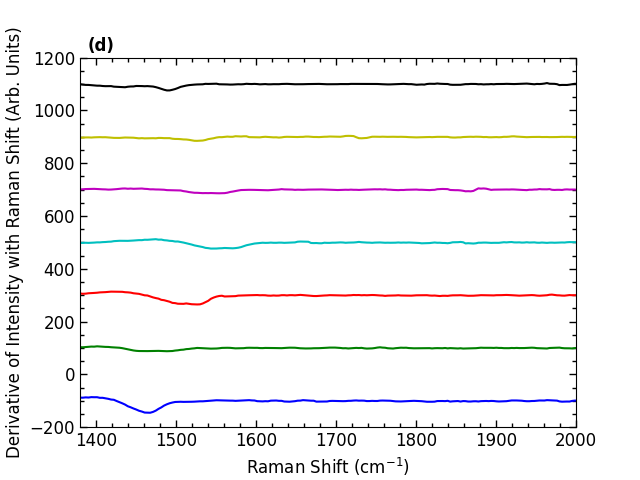

In [27]:
#Plotting derivative of 40X Raman
i = 0
offset = -200
fig,ax = plt.subplots()
for f in dict_RS_40X.keys():
    offset = offset +100
    Derivative = (dict_RS_40X[f].Intensity.diff()/dict_RS_40X[f].RS.diff()).rolling(5, center =True).mean()
    idx = Derivative[60:120].idxmin()
    idx = idx+40     
    ax.plot(dict_RS_40X[f].RS,(Derivative)+offset, color = colors[i])
    offset = offset+100
    i = i+1
#ax.legend(loc="upper right")
ax.text(1390, 1225, '(d)', weight = 'bold')

ax.set_xlim(1380,2000)
ax.set_ylim(-200,1200)
ax.set_ylabel("Derivative of Intensity with Raman Shift (Arb. Units)")
ax.set_xlabel("Raman Shift (cm$^{-1}$)");

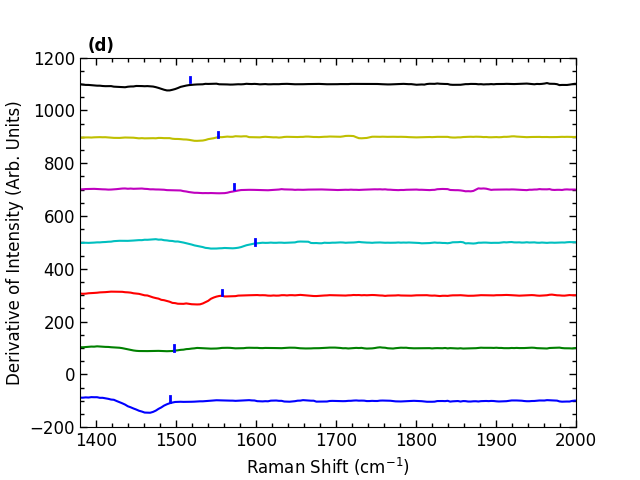

In [28]:
# Sample data points as tuples
data = [(1492, -103), (1497, 90), (1558, 300), (1599, 491), (1573, 702), (1552, 899), (1517,1107)]  # Replace this with your data points

# Extracting x and y coordinates from the tuples
x_coords = [point[0] for point in data]
y_values = [point[1] for point in data]


# Length of the vertical lines
line_length = 20

# Plotting small vertical lines at each x-coordinate
for x, y in data:
    ax.plot([x, x], [y, y + line_length], color='blue', linestyle='-', linewidth=2)

# Customizing the plot
ax.set_ylabel("Derivative of Intensity (Arb. Units)")
ax.set_xlabel("Raman Shift (cm$^{-1}$)");

# Show plot
plt.show()


In [29]:
#plt.savefig('../publication_ready/RDer_40X.pdf',bbox_inches='tight')

In [30]:
plt.close('all')